<a href="https://colab.research.google.com/github/GauriMittal24/AI-lab-assignments/blob/main/AI_Lab_Assignment_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
pip install user-agents


In [26]:
# Analysing data
with open('log_file.log','r') as log_file:
  log_data=log_file.readlines()

log_data

['87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"\n',
 '91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"\n',
 '91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"\n',
 '87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) App

In [27]:
# Sanitizing and structuring the data
import re

# Define a function to parse log entries
def parse_log_entry(log_entry):
    # Use regular expressions to extract relevant information
    pattern = r'(\S+) - - \[(.*?)\] "(.*?)" (\d+) (\d+) "(.*?)" "(.*?)"'
    match = re.match(pattern, log_entry)
    if match:
        ip_address = match.group(1)
        timestamp = match.group(2)
        request_info = match.group(3)
        http_status_code = int(match.group(4))
        content_length = int(match.group(5))
        referer = match.group(6)
        user_agent = match.group(7)

        # Return the extracted data as a dictionary
        return {
            "IP Address": ip_address,
            "Timestamp": timestamp,
            "Request Info": request_info,
            "HTTP Status Code": http_status_code,
            "Content Length": content_length,
            "Referer": referer,
            "User-Agent": user_agent
        }
    else:
        return None

# Read the log file
log_entries = []
with open('log_file.log', 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

# Now, log_entries contains the sanitized log data in a structured format
# You can perform various analyses on this data using libraries like pandas


In [28]:
# Converting list of dictionaries to dataframe
import pandas as pd
df=pd.DataFrame(log_entries)

In [29]:
df.head(10)

,IP Address,Timestamp,Request Info,HTTP Status Code,Content Length,Referer,User-Agent
0,87.116.74.253,28/Feb/2022:14:04:44 +0200,POST /wp-admin/admin-ajax.php HTTP/2.0,200,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,87.116.74.253,28/Feb/2022:14:06:44 +0200,POST /wp-admin/admin-ajax.php HTTP/2.0,200,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
2,66.249.70.57,28/Feb/2022:14:06:46 +0200,GET /category/alpaca-bowls/ HTTP/1.1,200,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
3,66.249.70.59,28/Feb/2022:14:06:51 +0200,GET /wp-content/themes/woodmart/css/parts/widg...,200,992,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."
4,66.249.70.57,28/Feb/2022:14:06:52 +0200,GET /wp-content/themes/woodmart/css/parts/opt-...,200,308,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."
5,66.249.70.59,28/Feb/2022:14:06:53 +0200,GET /wp-content/themes/woodmart/css/parts/head...,200,793,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."
6,66.249.70.59,28/Feb/2022:14:06:54 +0200,GET /wp-content/themes/woodmart/css/parts/int-...,200,1241,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."
7,157.55.39.141,28/Feb/2022:14:06:54 +0200,GET /wp-content/uploads/2021/06/maklaud-endo-i...,200,104824,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
8,66.249.70.57,28/Feb/2022:14:06:55 +0200,GET /wp-content/plugins/js_composer/assets/lib...,200,56425,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."
9,66.249.70.57,28/Feb/2022:14:06:56 +0200,GET /wp-includes/js/dist/vendor/regenerator-ru...,200,6494,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."


In [30]:
# Converting timestamp to standard date time format
df['Timestamp']=pd.to_datetime((df['Timestamp']),format='%d/%b/%Y:%H:%M:%S %z')



In [31]:
# columns of data
df.columns

Index(['IP Address', 'Timestamp', 'Request Info', 'HTTP Status Code',
       'Content Length', 'Referer', 'User-Agent'],
      dtype='object')

In [32]:
df.head()

,IP Address,Timestamp,Request Info,HTTP Status Code,Content Length,Referer,User-Agent
0,87.116.74.253,2022-02-28 14:04:44+02:00,POST /wp-admin/admin-ajax.php HTTP/2.0,200,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,87.116.74.253,2022-02-28 14:06:44+02:00,POST /wp-admin/admin-ajax.php HTTP/2.0,200,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
2,66.249.70.57,2022-02-28 14:06:46+02:00,GET /category/alpaca-bowls/ HTTP/1.1,200,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
3,66.249.70.59,2022-02-28 14:06:51+02:00,GET /wp-content/themes/woodmart/css/parts/widg...,200,992,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."
4,66.249.70.57,2022-02-28 14:06:52+02:00,GET /wp-content/themes/woodmart/css/parts/opt-...,200,308,https://nargile.bg/category/alpaca-bowls/,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge..."


In [33]:
df.shape



(41855, 7)

In [34]:
top_10_hits = df['IP Address'].value_counts().head(10)
# Display the top 10 IP addresses with their hit counts
print(top_10_hits)










212.39.89.183      1109
46.10.120.188      1085
130.204.199.252    1081
212.39.89.155       925
91.139.164.207      826
37.63.1.109         760
46.238.56.74        703
212.39.89.57        679
31.211.159.44       621
109.107.88.160      605
Name: IP Address, dtype: int64


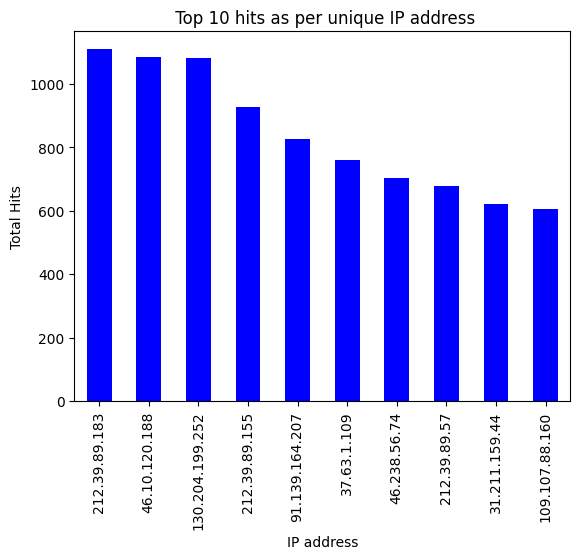

In [35]:
import matplotlib.pyplot as plt

# Visualizing top 10 hits as per unique IP address
top_10_hits.plot(kind='bar',color='Blue')
plt.xlabel('IP address')
plt.ylabel('Total Hits')
plt.title(' Top 10 hits as per unique IP address')
plt.show()

In [36]:
# Total no of http codes
count_http_codes=df['HTTP Status Code'].unique()
print(len(count_http_codes))

7


In [37]:
# Top 10 hits per url
hits_url=df['Request Info'].value_counts()
print(hits_url)

GET /wp-content/uploads/2021/05/HLGN-Logo.png HTTP/2.0                                                                                                                                           573
POST /?wc-ajax=get_refreshed_fragments HTTP/2.0                                                                                                                                                  546
POST /wp-admin/admin-ajax.php HTTP/2.0                                                                                                                                                           355
GET / HTTP/2.0                                                                                                                                                                                   332
GET /category/nargileta/ HTTP/2.0                                                                                                                                                                148
               

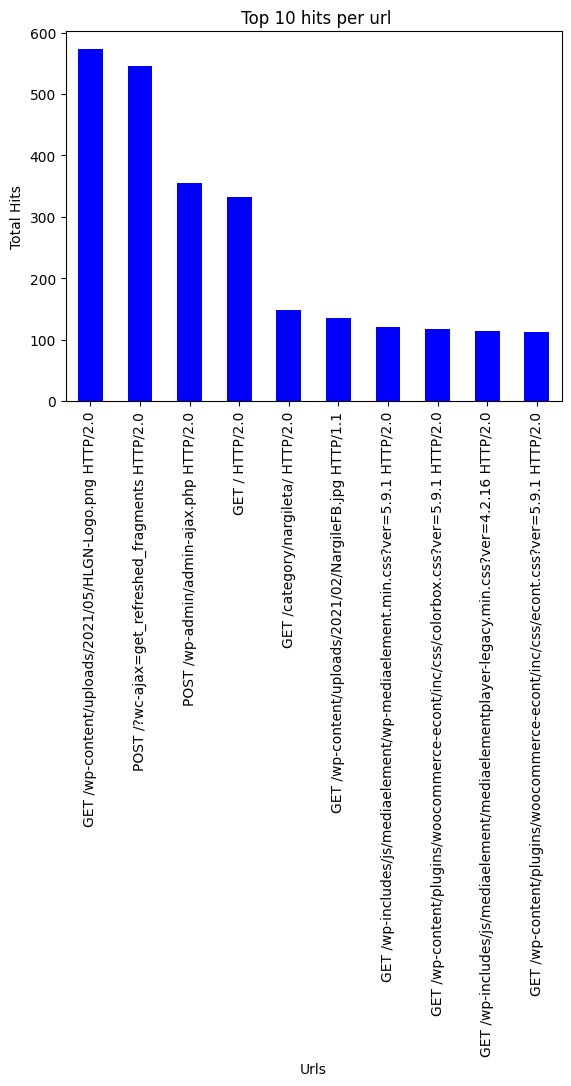

In [38]:
# Visualizing top 10 hits per url

hits_url.head(10).plot(kind='bar',color='Blue')
plt.xlabel('Urls')
plt.ylabel('Total Hits')
plt.title(' Top 10 hits per url')
plt.show()

In [39]:
# For extracting all the diff operating systems present in our dataframe we need to import user_agents library
from user_agents import parse
def extract_OS(user_agent):
  ua=parse(user_agent)
  return ua.os.family

In [40]:
df['OS']=df['User-Agent'].apply(extract_OS)
print(df['OS'])


0        Mac OS X
1        Mac OS X
2           Other
3           Other
4           Other
           ...   
41850     Android
41851     Android
41852     Android
41853     Android
41854     Android
Name: OS, Length: 41855, dtype: object


In [41]:
# Total hits per platform(Ios,Android)
hits_platform=df['OS'].value_counts().head()

print(hits_platform)


iOS         16229
Android     14384
Windows      9716
Mac OS X      803
Other         722
Name: OS, dtype: int64


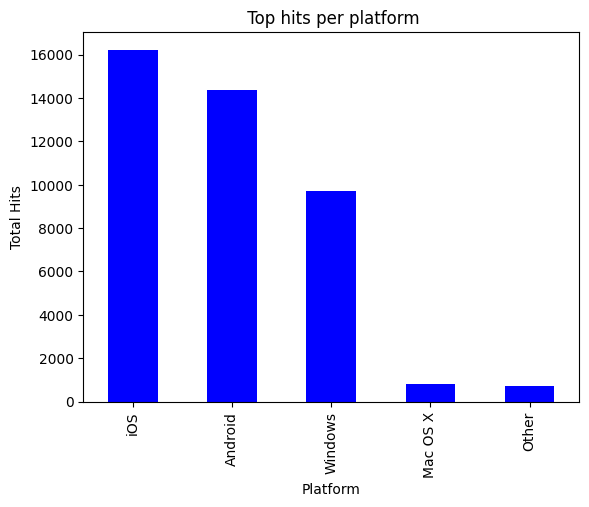

In [42]:
#Visualize hits per platform
hits_platform.plot(kind='bar',color='Blue')
plt.xlabel('Platform')
plt.ylabel('Total Hits')
plt.title(' Top hits per platform')
plt.show()


In [43]:

#Extracting browser
def extract_browser(user_agent):
  ua=parse(user_agent)
  return ua.browser.family
df['Browser']=df['User-Agent'].apply(extract_browser)
print(df['Browser'])

0                  Chrome
1                  Chrome
2               Googlebot
3               Googlebot
4               Googlebot
               ...       
41850    Samsung Internet
41851    Samsung Internet
41852    Samsung Internet
41853    Samsung Internet
41854    Samsung Internet
Name: Browser, Length: 41855, dtype: object


In [44]:
# Total hits per browser
hits_browser=df['Browser'].value_counts()

print(hits_browser)

Chrome Mobile                 11235
Mobile Safari                  9771
Chrome                         6896
Instagram                      3080
Opera                          2108
Google                         1407
Chrome Mobile WebView          1217
Firefox                        1075
Mobile Safari UI/WKWebView     1034
Chrome Mobile iOS               800
Facebook                        794
Edge                            560
Samsung Internet                442
Firefox Mobile                  241
bingbot                         237
Opera Mobile                    235
FacebookBot                     190
Googlebot                       184
Safari                           80
WooCommerce                      64
WordPress                        56
PetalBot                         42
AhrefsBot                        26
Other                            22
SemrushBot                       18
Googlebot-Image                  13
YandexBot                         9
Viber                       

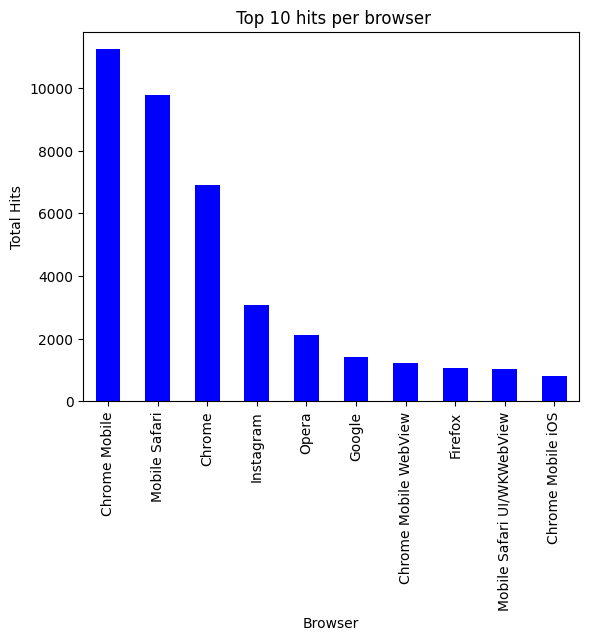

In [45]:
#Visualize top 10 hits per browser
hits_browser.head(10).plot(kind='bar',color='Blue')
plt.xlabel('Browser')
plt.ylabel('Total Hits')
plt.title(' Top 10 hits per browser')
plt.show()


In [56]:
# Extracting hour info from time
df['Hour'] = df['Timestamp'].dt.hour
print(df['Hour'])


0        14
1        14
2        14
3        14
4        14
         ..
41850    23
41851    23
41852    23
41853    23
41854    23
Name: Hour, Length: 41855, dtype: int64


In [57]:
#Top 10 hits hourly basis
top_10_hits_hour=df['Hour'].value_counts()
print(top_10_hits_hour)

19    6374
18    5106
16    4430
20    4298
21    4202
15    3924
17    3919
22    3760
14    3405
23    2437
Name: Hour, dtype: int64


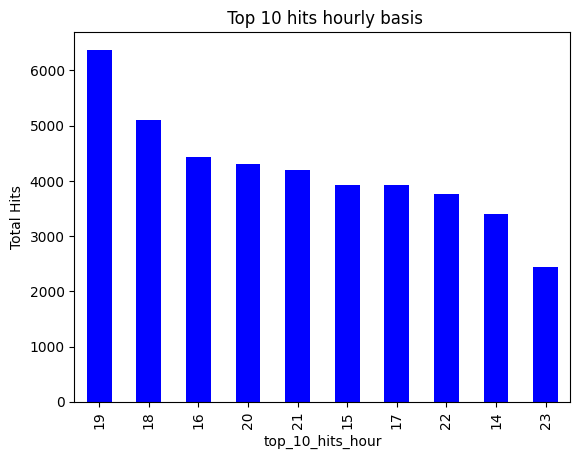

In [58]:
#Visualize top 10 hits hourly basis
top_10_hits_hour.plot(kind='bar',color='Blue')
plt.xlabel('top_10_hits_hour')
plt.ylabel('Total Hits')
plt.title(' Top 10 hits hourly basis')
plt.show()


In [59]:
6.#Traffic distribution on each site hourly basis (size of data/total number of hours)
# Group the data by the hour and calculate the total size of data for each hour
hourly_traffic = df.groupby('Hour')['Content Length'].sum().reset_index()

# Calculate the total number of hours
total_hours = len(hourly_traffic)

# Calculate the traffic distribution for each site
hourly_traffic_distribution = df.groupby(['Referer', 'Hour'])['Content Length'].sum().unstack(fill_value=0)
hourly_traffic_distribution = hourly_traffic_distribution.div(total_hours)

# Display the traffic distribution on each site hourly basis
print(hourly_traffic_distribution)


Hour                                                       14         15  \
Referer                                                                    
-                                                   1666781.8  1818556.3   
android-app://com.google.android.googlequicksea...        0.0        0.0   
http://cpcalendars.nargile.bg/                            0.0        5.2   
http://cpcontacts.nargile.bg/                             0.0        5.2   
http://m.facebook.com/                                30529.4    22871.8   
...                                                       ...        ...   
https://www.google.co.uk/                                 0.0        0.0   
https://www.google.com/                              142838.2   161863.4   
https://www.google.de/                                    0.0        0.0   
https://www.instagram.com/                                0.0        0.0   
https://www.tiktok.com/                                   0.0        0.0   

Hour       